In [3]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [8]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

## Confidence interval for the slope

In [10]:
births = Table.read_table('baby.csv')
births.show(3)

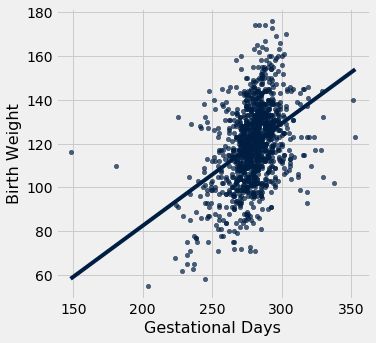

In [5]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [6]:
def bootstrap_slope(t, x, y, repetitions=5000):
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(left, 'to', right)

In [13]:
slope(births, 'Gestational Days', 'Birth Weight')

0.4665568769492152

Slope of regression line: 0.4665568769492152
Approximate 95%-confidence interval for the slope of the true line:
0.3826796178374302 to 0.5502860699606056


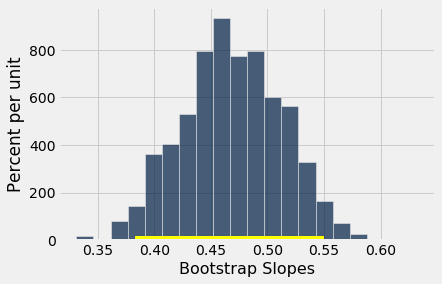

In [15]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight', 1000)

## Classification

In [17]:
# ckd = chronic kidney disease
# class = 1 = has ckd
# class = 0 = does not have ckd

ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

In [18]:
ckd.group('Class')

Class | count
0     | 115
1     | 43

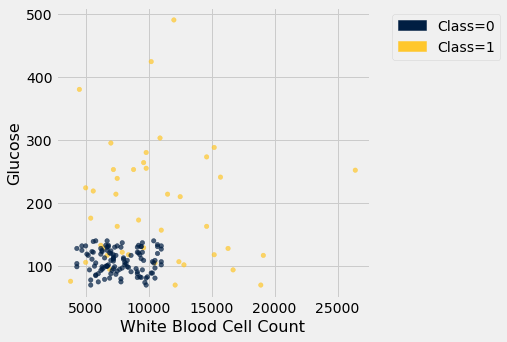

In [19]:
#Could you predict if a patient has ckd?
ckd.scatter('White Blood Cell Count', 'Glucose', colors='Class')

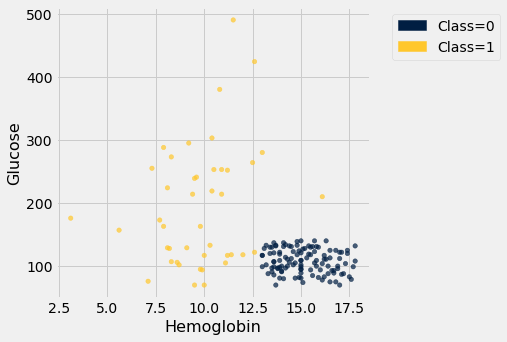

In [20]:
ckd.scatter('Hemoglobin', 'Glucose', colors='Class')

In [21]:
#Can you tell if a bank note is counterfeit or legitimate?
#Variables based on photgraphs of many banknotes (a few numbers for each image calculated)

banknotes = Table.read_table('banknote.csv')
banknotes

WaveletVar | WaveletSkew | WaveletCurt | Entropy  | Class
3.6216     | 8.6661      | -2.8073     | -0.44699 | 0
4.5459     | 8.1674      | -2.4586     | -1.4621  | 0
3.866      | -2.6383     | 1.9242      | 0.10645  | 0
3.4566     | 9.5228      | -4.0112     | -3.5944  | 0
0.32924    | -4.4552     | 4.5718      | -0.9888  | 0
4.3684     | 9.6718      | -3.9606     | -3.1625  | 0
3.5912     | 3.0129      | 0.72888     | 0.56421  | 0
2.0922     | -6.81       | 8.4636      | -0.60216 | 0
3.2032     | 5.7588      | -0.75345    | -0.61251 | 0
1.5356     | 9.1772      | -2.2718     | -0.73535 | 0
... (1362 rows omitted)

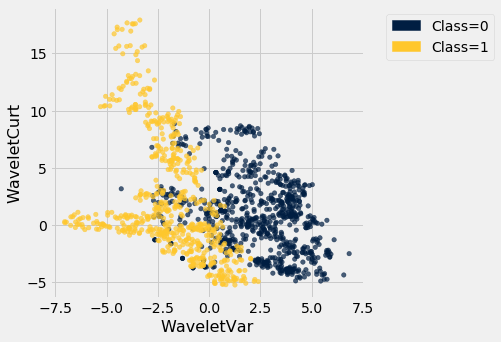

In [23]:
banknotes.scatter('WaveletVar', 'WaveletCurt', colors='Class')

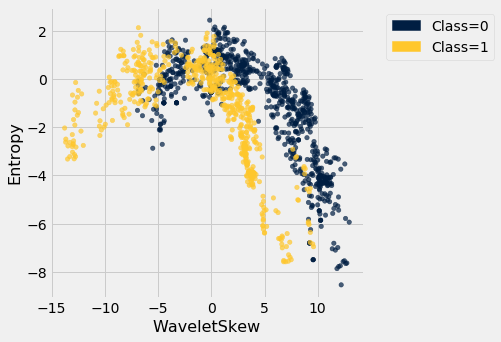

In [24]:
banknotes.scatter('WaveletSkew', 'Entropy', colors='Class')

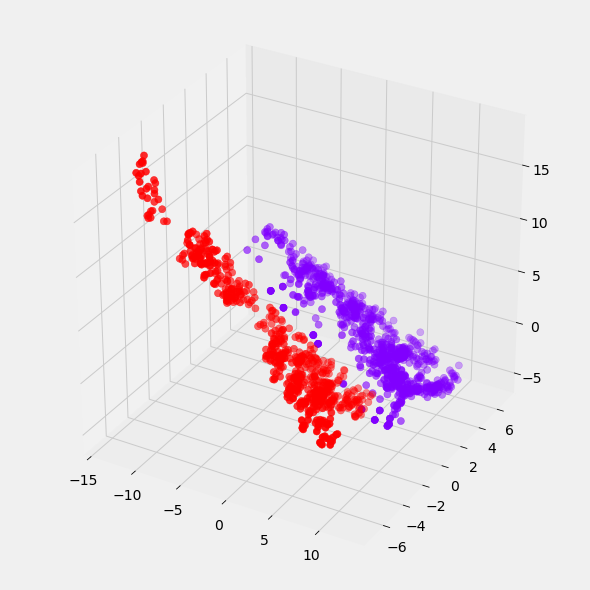

In [34]:
#Two attributes have some overlap of classes...what happens with three attributes?
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'),
           cmap='rainbow', #'viridis',
          s=50);